In [ ]:
!pip install medmnist

In [1]:
cd utils

/mnt/c/Users/nilsv/OneDrive/Documentos/MasterDataScience/UNIPD/HDA/Project/utils


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from models import cnn
from training import train_cnn
from medmnist import BloodMNIST

2024-11-12 19:09:32.344853: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-12 19:09:34.419109: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Define a function to get the label names
def label_name(label):
    names = ['Eosinophil', 'Basophil', 'Neutrophil', 'Lymphocyte', 'Monocyte', 'Platelet', 'RBC', 'Background']
    return names[label]

In [4]:
# Load the dataset of the images using size 64
train_dataset = BloodMNIST(split='train', download=True, size=64) 
val_dataset = BloodMNIST(split='val', download=True, size=64) 
test_dataset = BloodMNIST(split='test', download=True, size=64) 

Using downloaded and verified file: /home/nilsvanesostos/.medmnist/bloodmnist_64.npz
Using downloaded and verified file: /home/nilsvanesostos/.medmnist/bloodmnist_64.npz
Using downloaded and verified file: /home/nilsvanesostos/.medmnist/bloodmnist_64.npz


In [5]:
# Convert the datasets into tf.data.Dataset format
def create_tf_dataset(medmnist_dataset):
    images = []
    labels = []
    
    # Collect images and labels
    for img, label in medmnist_dataset:
        images.append(img)
        labels.append(label)
    
    # Convert to numpy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    # Create TensorFlow dataset
    return tf.data.Dataset.from_tensor_slices((images, labels))

In [6]:
# Convert MedMNIST datasets to TensorFlow datasets
train_tf_dataset = create_tf_dataset(train_dataset)
val_tf_dataset = create_tf_dataset(val_dataset)
test_tf_dataset = create_tf_dataset(test_dataset)

2024-11-12 19:10:01.704782: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-12 19:10:01.727469: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-12 19:10:02.705414: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 146952192 exceeds 10% of free system memory.


In [7]:
# Function to preprocess the images (convert to Tensor and normalize)
def preprocess_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1] like PyTorch's ToTensor
    return image, label

In [8]:
# Apply preprocessing to the datasets
train_tf_dataset = train_tf_dataset.map(preprocess_image)
val_tf_dataset = val_tf_dataset.map(preprocess_image)
test_tf_dataset = test_tf_dataset.map(preprocess_image)

# Batch the datasets (like PyTorch's DataLoader)
batch_size = 64
train_tf_dataset = train_tf_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
val_tf_dataset = val_tf_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_tf_dataset = test_tf_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

2024-11-12 19:10:11.498645: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 146952192 exceeds 10% of free system memory.


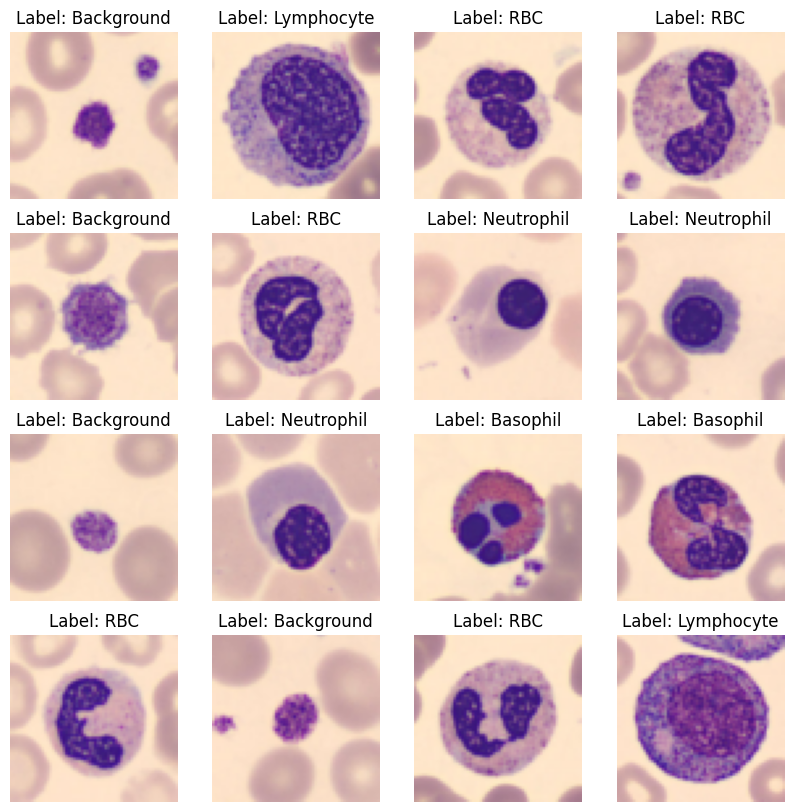

2024-11-12 19:10:18.559958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [9]:
# Visualize a batch of training data
for images, labels in train_tf_dataset.take(1):
    # Plot images (display first 16 images in the batch)
    plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(images[i].numpy())  # Convert tensor to numpy for plotting
        plt.title(f"Label: {label_name(labels[i].numpy()[0])}")
        plt.axis('off')
    plt.show()

# CNN

In [10]:
# Define input shape and number of classes
input_shape = (64, 64, 3)

# Create the CNN model
model = cnn(input_shape=input_shape)

# Print the model summary
model.summary()

2024-11-12 19:10:19.456295: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.
2024-11-12 19:10:19.617442: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.
2024-11-12 19:10:20.227767: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 268435456 exceeds 10% of free system memory.


Model: "cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 524288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    67,108,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,202,442 (256.36 MB)

 Trainable params: 67,202,442 (256.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 62s 310ms/step - accuracy: 0.4934 - loss: 1.3306 - val_accuracy: 0.8137 - val_loss: 0.5777
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 49s 264ms/step - accuracy: 0.7915 - loss: 0.5790 - val_accuracy: 0.8884 - val_loss: 0.3507
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 50s 265ms/step - accuracy: 0.8724 - loss: 0.3591 - val_accuracy: 0.8785 - val_loss: 0.3294
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 51s 274ms/step - accuracy: 0.9033 - loss: 0.2784 - val_accuracy: 0.9171 - val_loss: 0.2449
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 52s 276ms/step - accuracy: 0.9251 - loss: 0.2164 - val_accuracy: 0.9404 - val_loss: 0.1850
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 53s 282ms/step - accuracy: 0.9364 - loss: 0.1840 - val_accuracy: 0.9480 - val_loss: 0.1561
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 60s 323ms/step - accuracy: 0.9452 - loss: 0.1610 - val_accuracy: 0.9521 - val_loss: 0.1557
Epoch 8/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 62s 332ms/step - accuracy: 0.9494 - loss: 0

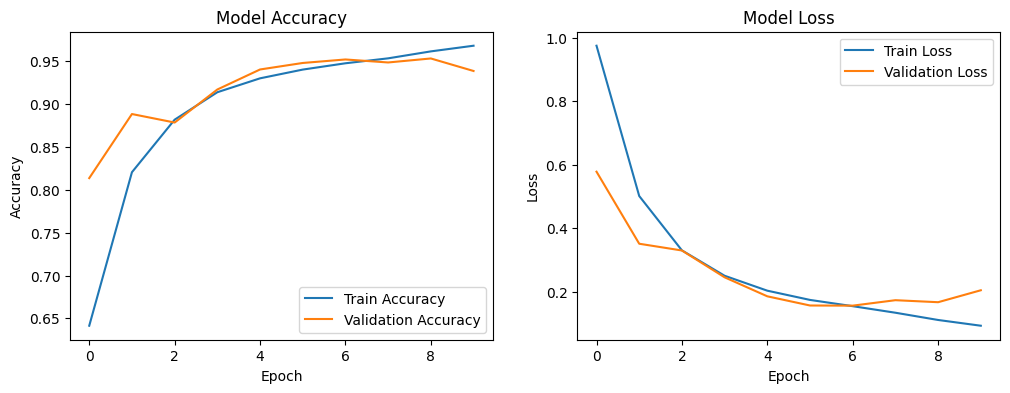

In [17]:
# Initialize the model
model = cnn(input_shape=(64, 64, 3))

# Assuming `train_tf_dataset`, `val_tf_dataset`, and `test_tf_dataset` are defined
trained_model, history = train_cnn(
    model=model,
    train_dataset=train_tf_dataset,
    val_dataset=val_tf_dataset,
    test_dataset=test_tf_dataset,
    epochs=10,
    learning_rate=0.001
)